In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import pickle
import re

In [2]:
df1 = pd.read_csv("amazon_alexa.tsv",delimiter='\t')
df1

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
df1.shape

(3150, 5)

In [4]:
df1.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [5]:
df1.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [6]:
df1[df1['verified_reviews'].isnull()]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [7]:
df1.dropna(inplace=True)

In [8]:
df1.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [9]:
df1['Length']=df1['verified_reviews'].apply(len)

In [10]:
df1

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [11]:
df1.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
Length               int64
dtype: object

In [12]:
df1.rating.value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

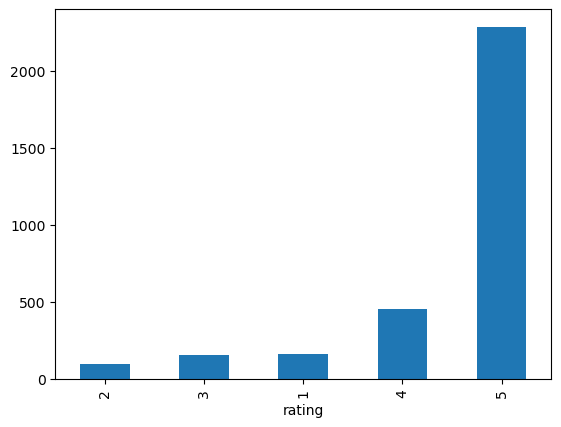

In [13]:
df1.rating.value_counts().sort_values().plot(kind='bar')
plt.show()

In [14]:
(df1.rating.value_counts(normalize=True)*100).round(2)

rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: proportion, dtype: float64

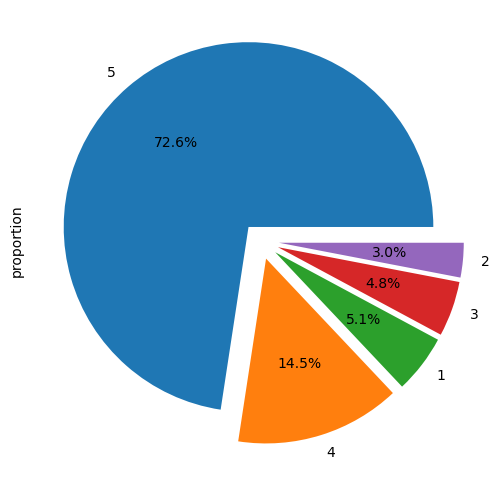

In [15]:
plt.figure(figsize=(6,6))
explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
((df1.rating.value_counts(normalize=True)*100).round(2)).plot(kind='pie',autopct="%1.1f%%",explode=explode)
plt.show()

In [16]:
df1.feedback.value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [17]:
# 0 is negative and 1 is positive review

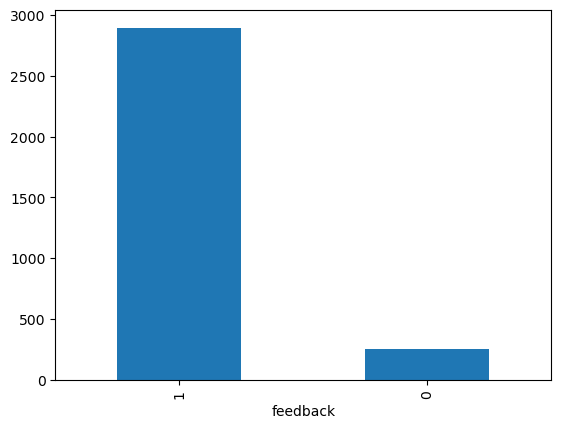

In [18]:
df1.feedback.value_counts().plot(kind='bar')
plt.show()

In [19]:
(df1.feedback.value_counts(normalize=True)*100).round(2)

feedback
1    91.87
0     8.13
Name: proportion, dtype: float64

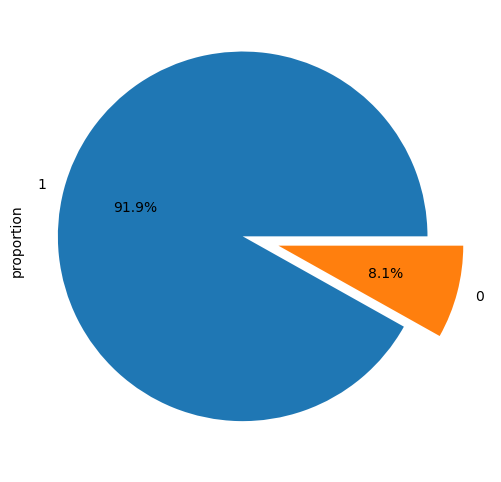

In [20]:
plt.figure(figsize=(6,6))
explode = (0.1, 0.1) 
((df1.feedback.value_counts(normalize=True)*100).round(2)).plot(kind='pie',autopct="%1.1f%%",explode=explode)
plt.show()

In [21]:
df1[df1['feedback']==0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [22]:
df1[df1['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [23]:
df1.variation.value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

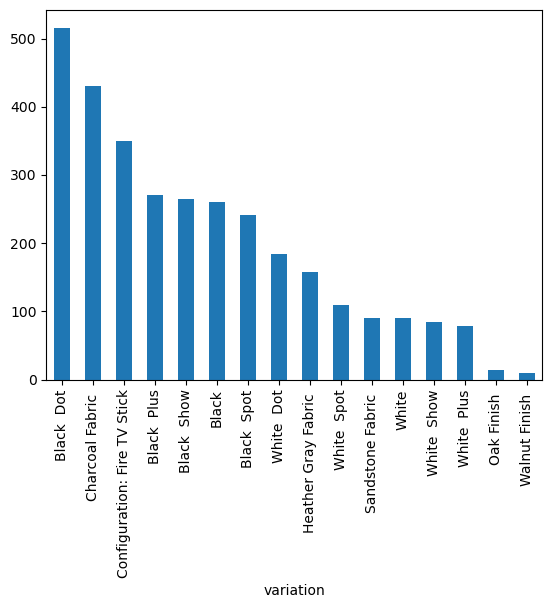

In [24]:
df1.variation.value_counts().plot(kind='bar')
plt.show()

In [25]:
df1.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

<Axes: xlabel='variation'>

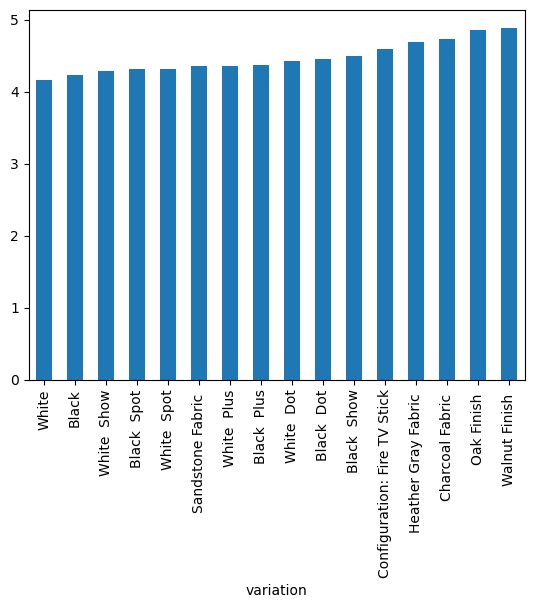

In [26]:
df1.groupby('variation')['rating'].mean().sort_values().plot(kind='bar')

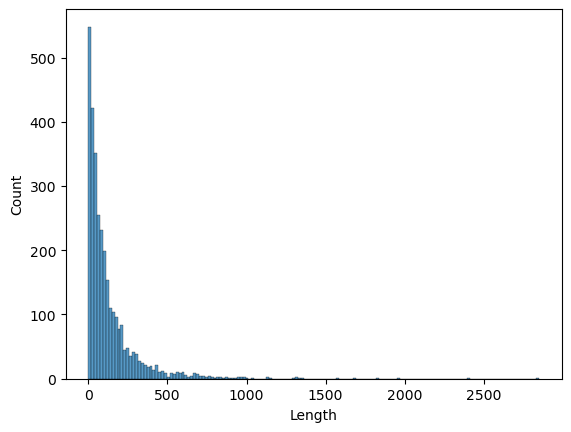

In [27]:
sns.histplot(df1['Length'])
plt.show()

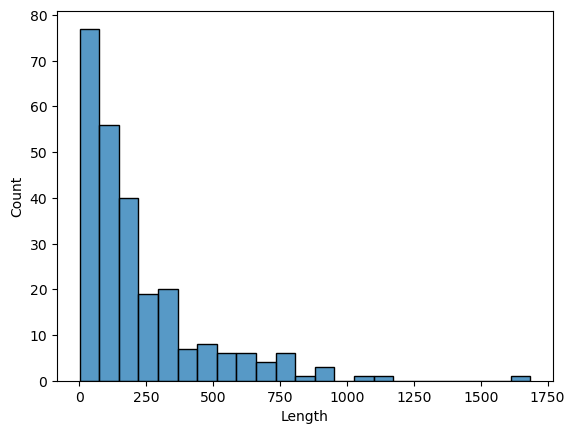

In [28]:
sns.histplot(df1[df1['feedback']==0]['Length'])
plt.show()

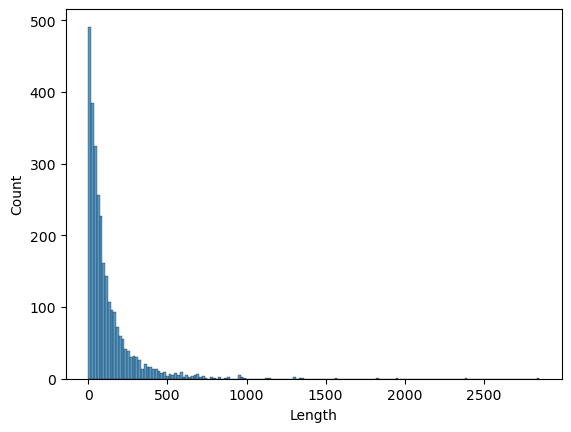

In [29]:
sns.histplot(df1[df1['feedback']==1]['Length'])
plt.show()

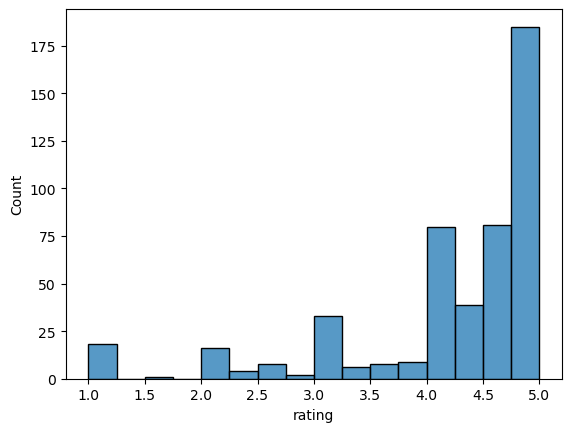

In [30]:
sns.histplot(df1.groupby('Length')['rating'].mean())
plt.show()

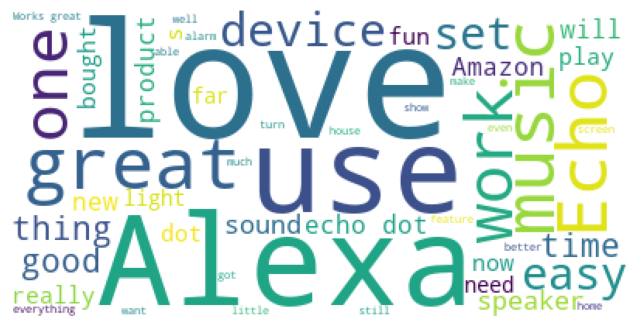

In [31]:
reviews = " ".join([review for review in df1['verified_reviews']])

wc = WordCloud(background_color='white', max_words=50)
words = wc.generate(reviews)
plt.figure(figsize=(8,8))
plt.imshow(words)
plt.axis('off')
plt.show()

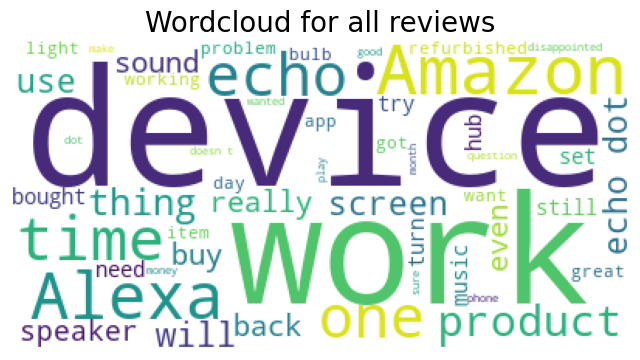

In [32]:
reviews = " ".join([review for review in df1[df1['feedback'] == 0]['verified_reviews']])
wc = WordCloud(background_color='white', max_words=50)
words = wc.generate(reviews)
plt.figure(figsize=(8,8))
plt.imshow(words)
plt.title('Wordcloud for all reviews', fontsize=20)
plt.axis('off')
plt.show()

In [33]:
neg_reviews = " ".join([review for review in df1[df1['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df1[df1['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

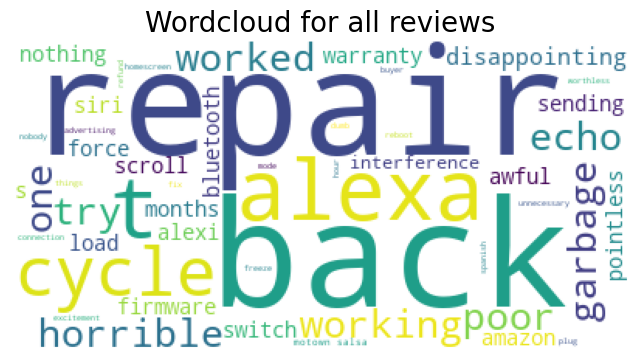

In [34]:
wc = WordCloud(background_color='white', max_words=50)
words = wc.generate(unique_negative)
plt.figure(figsize=(8,8))
plt.imshow(words)
plt.title('Wordcloud for all reviews', fontsize=20)
plt.axis('off')
plt.show()

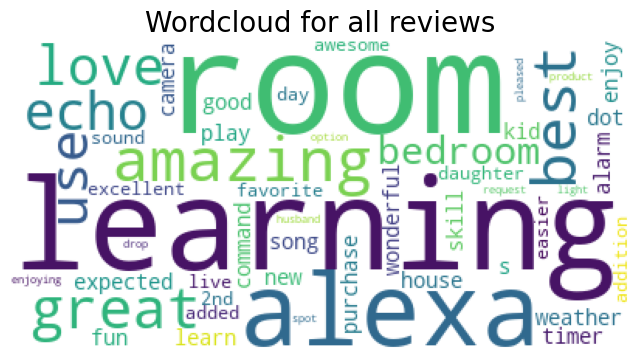

In [35]:
wc = WordCloud(background_color='white', max_words=50)
words = wc.generate(unique_positive)
plt.figure(figsize=(8,8))
plt.imshow(words)
plt.title('Wordcloud for all reviews', fontsize=20)
plt.axis('off')
plt.show()

Preprocessing and Modelling

In [36]:
corpus = []
stemmer = PorterStemmer()
custom_stopwords = set(STOPWORDS) - {'not'}
for i in range(0,df1.shape[0]):
    review = re.sub('[^a-zA-Z]',' ',df1.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in custom_stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [37]:
cv = CountVectorizer(max_features = 2500)

X = cv.fit_transform(corpus).toarray()
y = df1.feedback.values

In [38]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [40]:
X_train.max()

12

In [41]:
X_train.min()

0

In [42]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train.max()

1.0

#MODEL

In [44]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.9954627949183303
Testing Accuracy : 0.944973544973545


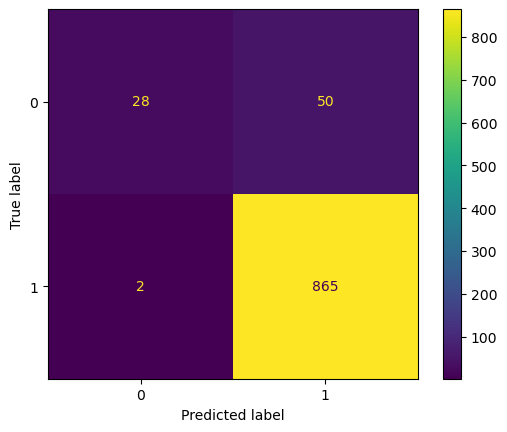

In [46]:
y_preds = model.predict(X_test)
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
cm_display.plot()
plt.show()

In [47]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9323981900452489
Standard Variance : 0.012085557997041887


Predictive Model

In [48]:
def preprocess_text(text):
    stemmer = PorterStemmer()
    STOPWORDS = set(stopwords.words('english'))
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower().split()  # Lowercase and split
    text = [stemmer.stem(word) for word in text if word not in STOPWORDS]  # Stemming and remove stopwords
    return ' '.join(text)

In [49]:
user_input="im sad with product,disoppointing,worst"

In [50]:
processed_input = preprocess_text(user_input)

# Transform the input text using the TF-IDF vectorizer
input_tfidf = cv.transform([processed_input])

# Predict the sentiment
prediction = model.predict(input_tfidf)[0]

# Display the result
sentiment = "Positive" if prediction == 1 else "Negative"
print(f"The predicted sentiment is: **{sentiment}**")

The predicted sentiment is: **Positive**


Wrong Prediction due to DATA IMBALANCE